<center> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/I-94.svg/105px-I-94.svg.png" alt="Here should be a image :o" /> </center>

# <center> Finding Heavy Traffic Indicators on I-94 </center>

In this project we explore dataset about hourly Interstate 94 Westbound traffic volume between Minneapolis and St Paul. We tried to find heavy traffic indicators on this road. 

The Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States ([source: en.wikipedia.org](https://en.wikipedia.org/wiki/Interstate_94)). 

You can download the dataset from **UCI Machine Learning Repository** [at this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00492/). Below is description of columns in above dataset. The columns has names:

* `holiday` - categorical US National holidays plus regional holiday, Minnesota State Fair
* `temp` - numeric average temp in kelvin
* `rain_1h` - numeric amount in mm of rain that occurred in the hour
* `snow_1h` - numeric amount in mm of snow that occurred in the hour
* `clouds_all` - numeric percentage of cloud cover
* `weather_main` - categorical short textual description of the current weather
* `weather_description` - vategorical longer textual description of the current weather
* `date_time` - dateTime hour of the data collected in local CST time
* `traffic_volume` - numeric hourly I-94 ATR 301 reported westbound traffic volume

## Importing libraries and reading in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading in the data
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Showing some rows
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Some informations about dataset

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Exploring column `traffic volume`

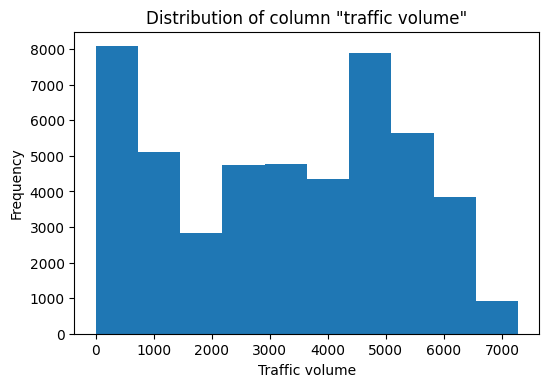

In [3]:
# Creating histogram of traffic_volume
data['traffic_volume'].plot.hist()
plt.title('Distribution of column "traffic volume"')
plt.xlabel('Traffic volume')
plt.show()

In [4]:
# Showing basic statistics
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The distribution doesn't look like normal distribution. It has 2 bars which have the most frequency (8000):
1. Bar between $0$ and $\approx750$.
2. Bar between $4500$ and $5000$.

The chart doesn't show left or right-handed, so it's hard to define distribution. It is presumed that influence on this shape of chart could have values for day and night.

Moreover average of traffic volume equals 3259.82 and the minimum and maximum values equals 0 and 7280. We can also say that 50% of traffic volume is less than 3380 cars and 50% of traffic volume is greater than 3380 cars. Only 1193 cars or less were in 25% of the time and 4933 cars or more were in 75% of the time. It's 4 times more than in 25% of the time, but it's probably split our dataset on dat and night.

## Day traffic vs. nigth traffic

In this point of project we split data on two sets. First is about daytime traffic volume and second is about nightime traffic volume. We had started with change type of date_time column from object to datetime type and then we isolated daytime data and nighttime data with function `dt.hour`. Our patern which helped us was:

* day was from 7 a.m. (inclusive) to 7 p.m.
* night was from 7.p.m (inclusive) to 7 a.m.

In [5]:
# Changing types of column to datetime type
data['date_time'] = pd.to_datetime(data['date_time'])

# Droping datas under 7 hour and over 19 hour
daytime = data[(data['date_time'].dt.hour >= 7) &
                 (data['date_time'].dt.hour < 19)]

# Droping datas over 7 hour and under 19 hour
nighttime = data[(data['date_time'].dt.hour >= 19) | 
                 (data['date_time'].dt.hour < 7)]

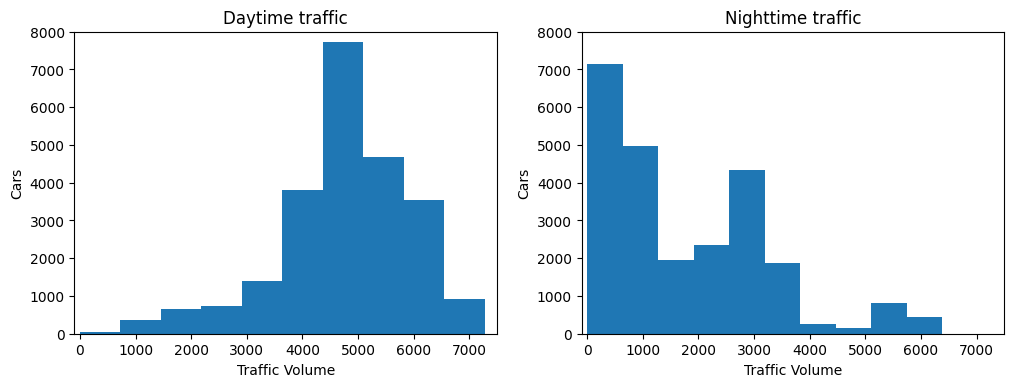

In [6]:
# Creating grid of day histogram and night histogram

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist(bins = 10)
plt.title('Daytime traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Cars')
plt.ylim(0, 8000)
plt.xlim(-100, 7500)

plt.subplot(1, 2, 2)
nighttime['traffic_volume'].plot.hist(bins = 10)
plt.title('Nighttime traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Cars')
plt.ylim(0, 8000)
plt.xlim(-100, 7500)

plt.show()

In [7]:
# Showing basic statistics about traffic volume at day
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
# Showing basic statistics about traffic volume at night
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

As we see above, daytime histogram has left-handed shape which indicates that during the day traffic volume grow. Nighttime histogram has right-handed shape what means that during night traffic volume is very small. When we saw some statistics about both datasets we clearly see that 75% rows in nighttime data is small than 2819 cars. It could testify that we shouldn't using the nighttime data because they don't have influence on analysis and may interfere with it.

The average and median of daytime data are very similar what means that this data will be more usefull to find heavy traffic indicators. That's why now we focus on days, months and hours to find more detailed information and draw concrete conclusions.

## Time indicators for the daytime data

In [9]:
# Creating a new column with month value
daytime['month'] = daytime['date_time'].dt.month

# Creating a new dataframe (DF) with averages grouping by month 
by_month = daytime.groupby('month').mean()

<ipython-input-9-287488bf9b33>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



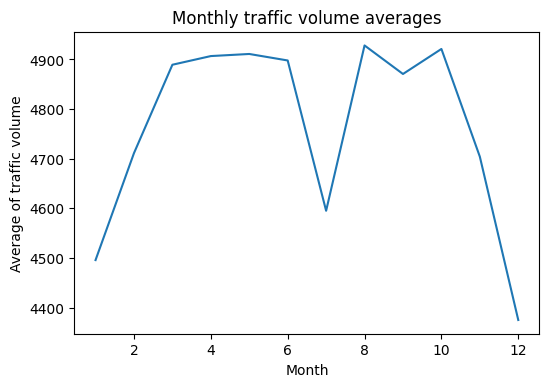

In [10]:
# Creating a plot line for months
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.ylabel('Average of traffic volume')
plt.title('Monthly traffic volume averages')
plt.show()

We can see on the line plot very interesting exception. Namely is noticeable that the traffic volume fall during the holidays. What could mean that the Interstate 94 road is more use during whole year except holiday months which are: 1 (January), 2(February), 7 (July) and 12 (December). So we can say:
1. Less traffic volume is at cold month (November - February)
2. Higer traffic volume is at warm months (March - October) except July

In [11]:
# Creating a new column with day of week value; 0 - Monday, 6 - Sunday
daytime['week_day'] = daytime['date_time'].dt.dayofweek

# Creating a new DF with averages grouping by day of week
by_week_day = daytime.groupby('week_day').mean()

<ipython-input-11-231bd4143846>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



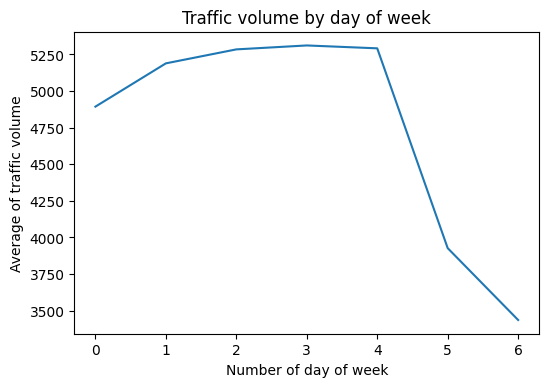

In [12]:
# Creating a line chart for days of week
by_week_day['traffic_volume'].plot.line()
plt.title('Traffic volume by day of week')
plt.xlabel('Number of day of week')
plt.ylabel('Average of traffic volume')
plt.show()

In [13]:
# Showing basic statistics
by_week_day['traffic_volume'].describe()

count       7.000000
mean     4761.958037
std       764.684759
min      3436.541789
25%      4410.400422
50%      5189.004782
75%      5288.027555
max      5311.303730
Name: traffic_volume, dtype: float64

On line plot we see a clear difference between business days and the weekend. The number of cars drop approximetly 1.5 times. What means that traffic volume at the weekend is samller than at other days.

We want to see that change between business days and the weekend. Below, we split daytime data on two data frames and visualize means of traffic volume by hour at bussiness day and at the weekend.

In [14]:
# Creating a new column with hour value
daytime['hour'] = daytime['date_time'].dt.hour

#Choosing work days
normal_days = daytime[daytime['week_day'] <= 4]

#Choosing weekend days
weekend = daytime[daytime['week_day'] > 4]

#Creating new DF basics on work days and weekend days with averages
by_hour_normal = normal_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

<ipython-input-14-368209ac8dda>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



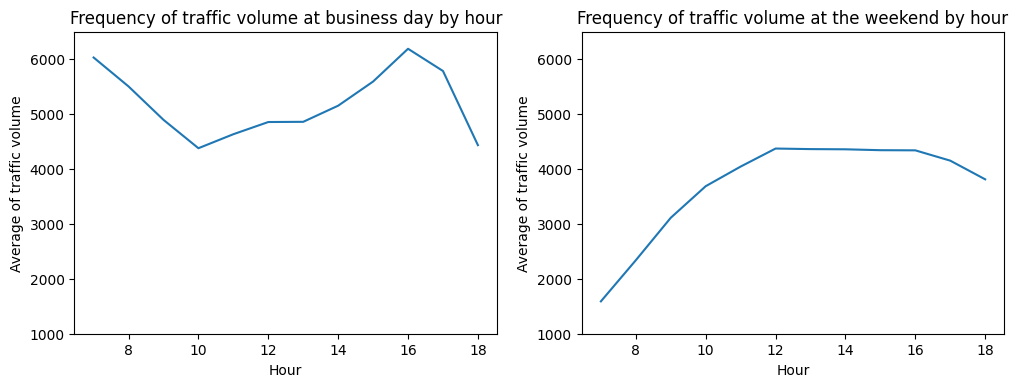

In [15]:
# Creating a grid for line plots
plt.figure(figsize = (12, 4))

# Creating first line plot for work days
plt.subplot(1, 2, 1)
by_hour_normal['traffic_volume'].plot.line()
plt.title('Frequency of traffic volume at business day by hour')
plt.xlabel('Hour')
plt.ylim(1000, 6500)
plt.ylabel('Average of traffic volume')

# Creating second line plot for the weekend
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Frequency of traffic volume at the weekend by hour')
plt.xlabel('Hour')
plt.ylim(1000, 6500)
plt.ylabel('Average of traffic volume')

plt.show()

In [16]:
print(f'Business days: \n{by_hour_normal["traffic_volume"].describe()}') 
print(f'The weekend: \n{by_hour_weekend["traffic_volume"].describe()}')

Business days: 
count      12.000000
mean     5192.498812
std       615.622781
min      4378.419118
25%      4799.891475
50%      5024.132518
75%      5640.880110
max      6189.473647
Name: traffic_volume, dtype: float64
The weekend: 
count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64


Analysing the charts we can say that:
* at business days traffic volume increase at morning and at evening;
* at the weekend traffic volume slowly rise since morining to 12:00 achieves constant value (approximetly) to 16:00 and then start to fall.

The increase in traffic on working days may be caused by people going to work at morning and by the same people going back to home.
Equally important is average of traffic volume, because for the weekend is much lower than for business days.

To sumarize information about time indicators:
1. Traffic is higier in warm months except July.
2. Traffic is higier at business days compare to the weekend.
3. Traffic is the most intensified at the morning and at the evening at the business days.
4. Traffic is intesified since 7:00 to 16:00.

## Weather Indicators

As we know more influnce on traffic volume has the weather. Any time if the weather will be bad the traffic volume will rise and rise. That's why we focus on the weather and try to find some indicator.

At first we found the correlation values between traffic_volume and numericla weather columns.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [18]:
# Calculating correlation value between every column and traffic_volume column
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
week_day         -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The correlation shows that only tempearture (0.13) may has include on traffic volume. Others columns don't have strong correlation. Let's focus on `temp` and `traffic_volume` column and we started with drawing the scatter plot.

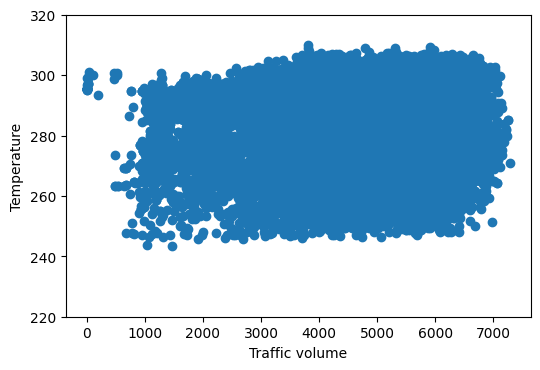

In [19]:
# Plotting scatter plot
plt.scatter(daytime['traffic_volume'], daytime['temp'])
plt.ylim(220, 320)
plt.ylabel('Temperature')
plt.xlabel('Traffic volume')
plt.show()

This scatter plot doesn't show us more than correlation value. Of course we can see minimal increase what confirm positive correlation but still we can't find more detailed information. So let's move to the weather types. Dataset has two more weather-related columns `weather main` and `weather_description`. 

We can distinguish 11 types of weather:

| | |
| :- | :- |
| 1. Clear   | 7. Rain          |
| 2. Clouds  | 8. Smoke         |
| 3. Drizzle | 9. Snow          |
| 4. Fog     | 10. Squall       |
| 5. Haze    | 11. Thunderstorm |
| 6. Mist    |                  |

In [20]:
# Creating new DF with averages of traffic groups by weather_main
by_weather_main = daytime.groupby('weather_main').mean()

# Creating new DF with averages of traffic groups by weather_description
by_weather_description = daytime.groupby('weather_description').mean()

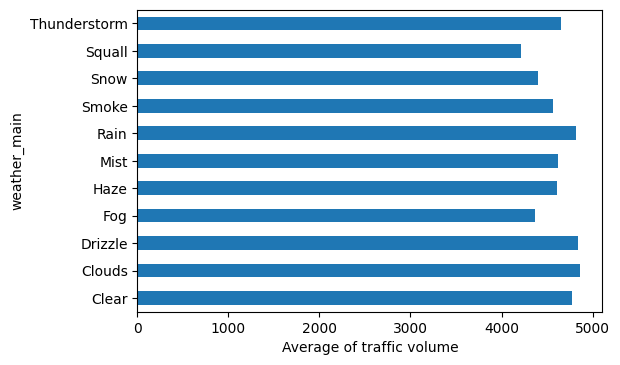

In [21]:
# Drawing a horizontal bar plot
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Average of traffic volume')

plt.show()

The above horizonal bar plot presents interesting thing, because all type of weather have average over 4000. Out of all types we can distinguish top 5 types (clouds, drizzle, rain, clear, thunderstorm) but any type have average over 5000, so let's check horiozntal bar plot for `weather_discription`. Maybe this data show some weather indicators.

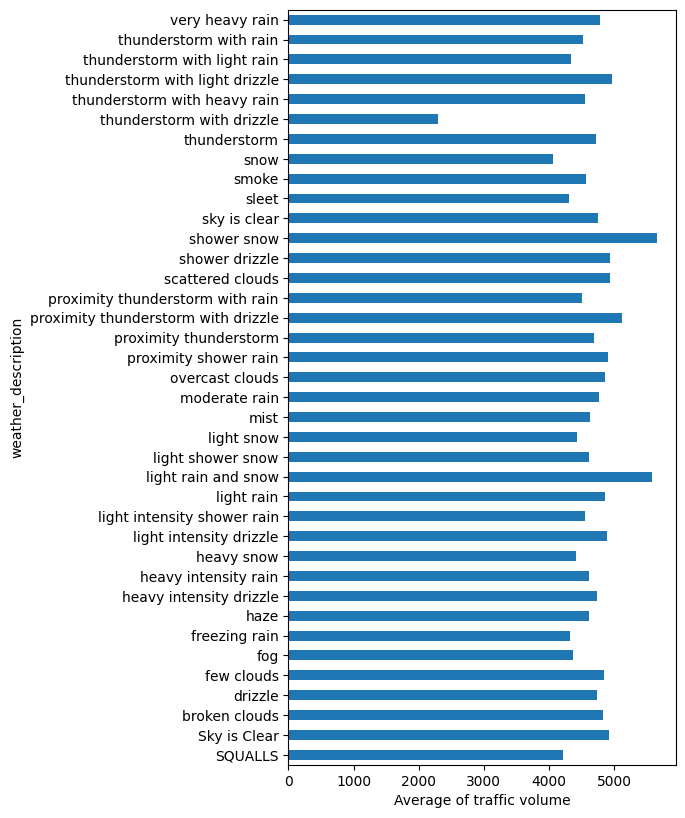

In [22]:
# Drawing a horizontal bar plot
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.xlabel('Average of traffic volume')

plt.show()

This bar chart is more detail and now we can distinguish 3 types of weather with average of traffic volume over 5000. It is:
1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle

## Conclusion

To sumarize every information which we found in this project. We can say that:

* The traffic volume is higer during the business day between 7:00 and 16:00.
* The traffic volume rise in warm months (March - October except July) and fall in cold months (November - February).
* The most intensive time of day at business days are mornig and evening because people going to work and back to home at that times.
* Most of weather types has average traffic volume under 5000, but 3 of them has. We colud tell traffic volume start to rise when the road becomes slippery because three highlighted types depend from water.